In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
#from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, Dropout,
                                     Embedding, SpatialDropout1D, Flatten)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# %matplotlib inline

In [2]:
path = '/datasets/'

Mounted at /content/drive


In [3]:
# Выводим список писателей
os.listdir(path + '/texts/')

['(О. Генри) Тестовая.txt',
 '(О. Генри) Обучающая.txt',
 '.ipynb_checkpoints',
 '(К. Саймак) Обучающая.txt',
 '(К. Саймак) Тестовая.txt',
 '(М. Фрай) Обучающая.txt',
 '(М. Фрай) Тестовая.txt',
 '(Р. Брэдберри) Обучающая.txt',
 '(Р. Брэдберри) Тестовая.txt',
 '(Братья Стругацкие) Обучающая.txt',
 '(Братья Стругацкие) Тестовая.txt',
 '(М. Булгаков) Обучающая.txt',
 '(М. Булгаков) Тестовая.txt']

In [4]:
# Создаем функцию открытия  и считывания файла
def read_text(file_name):
    t = open(file_name, 'r')
    text = t.read()
    text = text.replace('\n', '')

    return text

In [5]:
# Создаем классы
class_name = ['Братья Стругацкие', 'К. Саймак', 'М. Фрай', 'М. Булгаков', 'О. Генри', 'Р. Брэдберри']
n_classes = len(class_name)
n_classes

6

In [6]:
train_text = []
test_text = []

for i in class_name:
    for j in os.listdir('/content/drive/MyDrive/UAI/Data_CSV/texts/'):
        if i in j:
            if 'Обучающая' in j:
                train_text.append(read_text('/content/drive/MyDrive/UAI/Data_CSV/texts/' + j))
                print(j, 'Добавлен в обучающую выборку')
            if 'Тестовая' in j:
                test_text.append(read_text('/content/drive/MyDrive/UAI/Data_CSV/texts/' + j))
                print(j, 'Добавлен в Тестовую выборку')
    print()

(Братья Стругацкие) Обучающая.txt Добавлен в обучающую выборку
(Братья Стругацкие) Тестовая.txt Добавлен в Тестовую выборку

(К. Саймак) Обучающая.txt Добавлен в обучающую выборку
(К. Саймак) Тестовая.txt Добавлен в Тестовую выборку

(М. Фрай) Обучающая.txt Добавлен в обучающую выборку
(М. Фрай) Тестовая.txt Добавлен в Тестовую выборку

(М. Булгаков) Обучающая.txt Добавлен в обучающую выборку
(М. Булгаков) Тестовая.txt Добавлен в Тестовую выборку

(О. Генри) Тестовая.txt Добавлен в Тестовую выборку
(О. Генри) Обучающая.txt Добавлен в обучающую выборку

(Р. Брэдберри) Обучающая.txt Добавлен в обучающую выборку
(Р. Брэдберри) Тестовая.txt Добавлен в Тестовую выборку



In [8]:
# Смотрим количество элементов в выбоках
print(len(train_text))
print(len(test_text))

6
6


In [9]:
# Преобразовываем текстовые данные в цифровые
max_word_count = 12500
tokenizer = Tokenizer(num_words=max_word_count, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(train_text)
items = list(tokenizer.word_index.items())

In [10]:
# 100 наиболее встречающихся слов и размер словаря
print(items[:100])
print('Размер словаря:', len(items))

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20), ('мне', 21), ('из', 22), ('за', 23), ('меня', 24), ('ты', 25), ('же', 26), ('бы', 27), ('сказал', 28), ('вы', 29), ('было', 30), ('от', 31), ('они', 32), ('мы', 33), ('только', 34), ('да', 35), ('еще', 36), ('она', 37), ('о', 38), ('вот', 39), ('когда', 40), ('если', 41), ('уже', 42), ('был', 43), ('нет', 44), ('ни', 45), ('их', 46), ('ну', 47), ('чтобы', 48), ('до', 49), ('для', 50), ('ему', 51), ('ничего', 52), ('может', 53), ('или', 54), ('даже', 55), ('там', 56), ('очень', 57), ('кто', 58), ('ее', 59), ('тут', 60), ('потом', 61), ('просто', 62), ('чем', 63), ('него', 64), ('быть', 65), ('теперь', 66), ('под', 67), ('где', 68), ('нас', 69), ('есть', 70), ('тебя', 71), ('ли', 72), ('время', 73), ('тебе', 74), ('вас', 75), ('со', 76), ('нибудь', 77), ('

In [11]:
# Создаем последовательность индексов по частотному словарю
train_word_indexes = tokenizer.texts_to_sequences(train_text)
test_word_indexes = tokenizer.texts_to_sequences(test_text)

print('Фрагмент текста: ', test_text[2][:50])
print('Последовательность индексов: ', train_word_indexes[2][:20])

Фрагмент текста:  ﻿Слишком много кошмаровКогда балансируешь над проп
Последовательность индексов:  [1506, 1, 8, 282, 236, 11, 24, 10131, 6004, 3, 144, 7880, 1, 21, 3623, 1, 238, 12, 1, 1300]


In [ ]:
# можно проверить нахождение слова в словаре и его индекс
#print('Слово -> Индекс', tokenizer.word_index[input('Введите слово: ')])

In [12]:
 # Статистика по обучающим текстам
 symbols_train_text = 0
 words_train_text = 0

 for i in range(n_classes):
     print('Статистика по обучающим текстам: ', class_name[i],
           '' * (10 - len(class_name[i])), len(train_text[i]), 
           'символов', len(train_word_indexes[i]), 'слов')
     symbols_train_text += len(train_text[i])
     words_train_text += len(train_word_indexes[i])
print('.............')
print(f'В сумме символов: {symbols_train_text}, \nВ сумме слов: {words_train_text}')
print('___________________________')
# Статистика по тестовым текстам
symbols_test_text = 0
words_test_text = 0

for i in range(n_classes):
     print('Статистика по тестовым текстам: ', class_name[i],
           '' * (10 - len(class_name[i])), len(test_text[i]), 
           'символов', len(test_word_indexes[i]), 'слов')
     symbols_test_text += len(test_text[i])
     words_test_text += len(test_word_indexes[i])
print('.............')
print(f'В сумме символов: {symbols_test_text}, \nВ сумме слов: {words_test_text}')

Статистика по обучающим текстам:  Братья Стругацкие  2022329 символов 312918 слов
Статистика по обучающим текстам:  К. Саймак  1588800 символов 251412 слов
Статистика по обучающим текстам:  М. Фрай  3661761 символов 568476 слов
Статистика по обучающим текстам:  М. Булгаков  1748440 символов 261398 слов
Статистика по обучающим текстам:  О. Генри  1041692 символов 160550 слов
Статистика по обучающим текстам:  Р. Брэдберри  1364117 символов 214350 слов
.............
В сумме символов: 11427139, 
В сумме слов: 1769104
___________________________
Статистика по тестовым текстам:  Братья Стругацкие  697706 символов 108585 слов
Статистика по тестовым текстам:  К. Саймак  313329 символов 50322 слов
Статистика по тестовым текстам:  М. Фрай  1264891 символов 196635 слов
Статистика по тестовым текстам:  М. Булгаков  864739 символов 132715 слов
Статистика по тестовым текстам:  О. Генри  346752 символов 53220 слов
Статистика по тестовым текстам:  Р. Брэдберри  854550 символов 132404 слов
........

In [13]:
# Создаем функции для формирования выборок (ширина, шаг)
def get_set_from_indexes(word_indexes, w_len, step):
    X_sample = []
    words_len = len(word_indexes)
    index = 0

    while(index + w_len <= words_len):
        X_sample.append(word_indexes[index:index + w_len])
        index += step

    return X_sample

In [15]:
# Из двух листов индексов двух классов формируем обучающую и проверочную выборки
def create_sets_multi_classes(word_indexes, w_len, step):
    n_classes = len(word_indexes)
    classes_X_samples = []
    for wI in word_indexes:
        classes_X_samples.append(get_set_from_indexes(wI, w_len, step))

# Формируем общий x_samples
    X_samples = []
    y_samples = []

    for n in range(n_classes):
        x_t = classes_X_samples[n]
        for i in range(len(x_t)):
            X_samples.append(x_t[i])
            y_samples.append(utils.to_categorical(n, n_classes))

    X_samples = np.array(X_samples)
    y_samples = np.array(y_samples)

    return (X_samples, y_samples)

Подготовка данных

In [17]:
# Задаем параметры
w_len = 5000
step = 125

In [18]:
# Создаем обучающую и тестовую выборки
X_train, y_train = create_sets_multi_classes(train_word_indexes, w_len, step)
X_test, y_test = create_sets_multi_classes(test_word_indexes, w_len, step)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13916, 5000)
(13916, 6)
(5154, 5000)
(5154, 6)


In [19]:
# Преобразовываем полученные выборки в матрицы Мешка Слов и подаем в виде списка
X_train_bow = tokenizer.sequences_to_matrix(X_train.tolist())
X_test_bow = tokenizer.sequences_to_matrix(X_test.tolist())

X_train_bow.shape

(13916, 12500)

Создаем Нейросеть

In [20]:
model = Sequential([
                    #BatchNormalization(),
                    Dense(200, input_dim=max_word_count, activation='relu'),
                    Dropout(0.5),
                    BatchNormalization(),
                    #Dense(32, activation='relu'),
                    #Dense(32, activation='relu'),
                    #Dense(256, activation='relu'),
                    Dropout(0.5),
                    Dense(6, activation='softmax')
])

In [21]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train_bow, y_train, epochs=20, batch_size=64, validation_data=(X_test_bow, y_test))

Epoch 1/20
218/218 [==============================] - 8s 31ms/step - loss: 0.2826 - accuracy: 0.9190 - val_loss: 0.2072 - val_accuracy: 0.9602
Epoch 2/20
218/218 [==============================] - 6s 29ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.1742 - val_accuracy: 0.9643
Epoch 3/20
218/218 [==============================] - 6s 29ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1623 - val_accuracy: 0.9633
Epoch 4/20
218/218 [==============================] - 6s 29ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1477 - val_accuracy: 0.9664
Epoch 5/20
218/218 [==============================] - 6s 28ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9608
Epoch 6/20
218/218 [==============================] - 6s 28ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9686
Epoch 7/20
218/218 [==============================] - 6s 29ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.1042 - val_accuracy: 0.9769

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 200)               2500200   
_________________________________________________________________
dropout_30 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 200)               800       
_________________________________________________________________
dropout_31 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 1206      
Total params: 2,502,206
Trainable params: 2,501,806
Non-trainable params: 400
_________________________________________________________________


In [23]:
# максимальная точность  и ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history.history["val_loss"])}')

Максимальная точность обучающей выборки: 1.0 
Минимальная ошибка на обучающей выборе: 0.0003877678536809981 
Максимальная точность проверочной выборки: 0.9769111275672913 
Минимальная ошибка на проверочной выборе: 0.09703930467367172


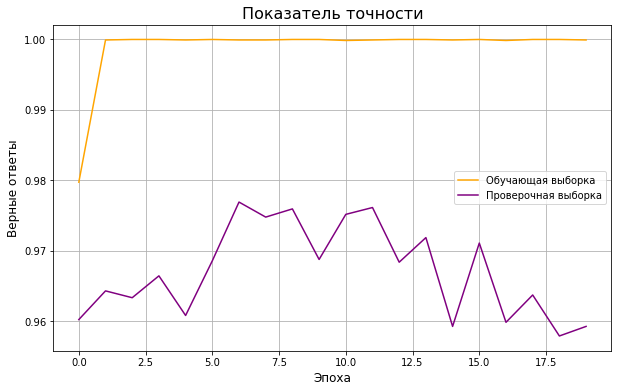

In [24]:
# # график показатель точности для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], color='orange', label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], color='purple', label='Проверочная выборка')
plt.title('Показатель точности', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Верные ответы', fontsize=12)
plt.legend()
plt.grid()
plt.show()

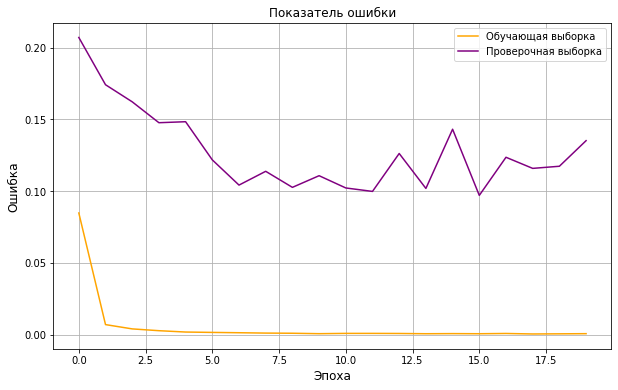

In [25]:
# график показатель ошибки для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='orange', label='Обучающая выборка')
plt.plot(history.history['val_loss'], color='purple', label='Проверочная выборка')
plt.title('Показатель ошибки')
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [26]:
# дообучение модели
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history_add = model.fit(X_train_bow, y_train, epochs=50, batch_size=128, validation_data=(X_test_bow, y_test))

Epoch 1/50
109/109 [==============================] - 6s 48ms/step - loss: 4.0600e-04 - accuracy: 1.0000 - val_loss: 0.1739 - val_accuracy: 0.9315
Epoch 2/50
109/109 [==============================] - 5s 45ms/step - loss: 5.6368e-04 - accuracy: 0.9998 - val_loss: 0.1359 - val_accuracy: 0.9633
Epoch 3/50
109/109 [==============================] - 5s 45ms/step - loss: 2.3358e-04 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9732
Epoch 4/50
109/109 [==============================] - 5s 45ms/step - loss: 2.4918e-04 - accuracy: 1.0000 - val_loss: 0.1055 - val_accuracy: 0.9707
Epoch 5/50
109/109 [==============================] - 5s 45ms/step - loss: 2.0558e-04 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9736
Epoch 6/50
109/109 [==============================] - 5s 45ms/step - loss: 2.3035e-04 - accuracy: 1.0000 - val_loss: 0.1204 - val_accuracy: 0.9668
Epoch 7/50
109/109 [==============================] - 5s 44ms/step - loss: 2.0746e-04 - accuracy: 1.0000 - val_loss: 0

In [28]:
# максимальная точность  и ошибка на обучающей и проверочной выборе дообученной модели
print(f'Максимальная точность обучающей выборки: {max(history_add.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_add.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history_add.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_add.history["val_loss"])}')

Максимальная точность обучающей выборки: 1.0 
Минимальная ошибка на обучающей выборе: 4.8233294364763424e-05 
Максимальная точность проверочной выборки: 0.9736127257347107 
Минимальная ошибка на проверочной выборе: 0.08005852997303009


Дообучение не повысило точность.

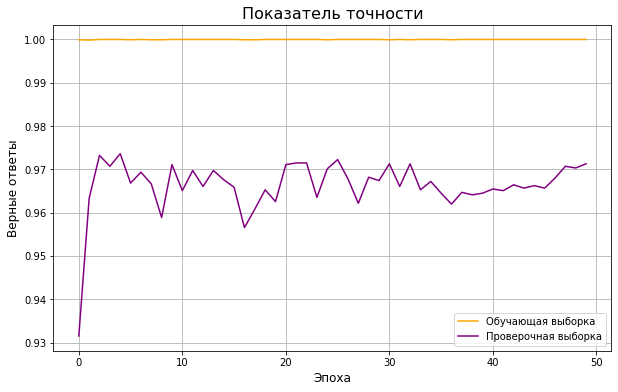

In [29]:
# # график показатель точности для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(history_add.history['accuracy'], color='orange', label='Обучающая выборка')
plt.plot(history_add.history['val_accuracy'], color='purple', label='Проверочная выборка')
plt.title('Показатель точности', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Верные ответы', fontsize=12)
plt.legend()
plt.grid()
plt.show()

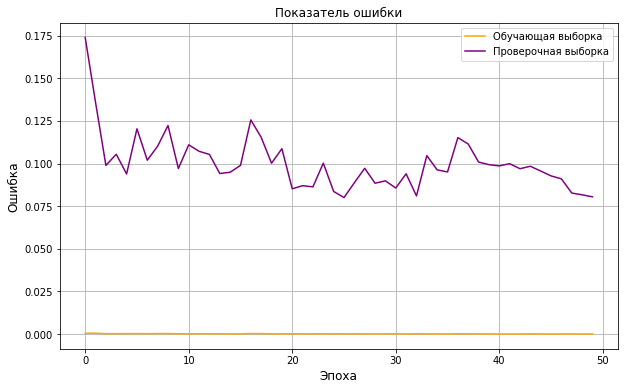

In [30]:
# график показатель ошибки для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(history_add.history['loss'], color='orange', label='Обучающая выборка')
plt.plot(history_add.history['val_loss'], color='purple', label='Проверочная выборка')
plt.title('Показатель ошибки')
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()
plt.grid()
plt.show()

Тестовая выборка


In [35]:
def create_test_multi_classes(word_indexes, w_len, spep):
    n_classes = len(word_indexes)
    X_test_classes = []
    X_test_array = []

    for wI in word_indexes:
        sample = (get_set_from_indexes(wI, w_len, step))
        X_test_array.append(sample)
        X_test_classes.append(tokenizer.sequences_to_matrix(sample))
    X_test_classes = np.array(X_test_classes)
    X_test_array = np.array(X_test_array)
    
    return X_test_classes, X_test_array

In [36]:
# Распознавание тестовой выборки и вывод результатов
def recognize_multi_class(model, X_test, model_name):
    print('НЕЙРОННАЯ СЕТЬ: ', model_name)
    print()

    total_sum_rec = 0

    for i in range(n_classes):
        curr_pred = model.predict(X_test[i])
        curr_out = np.argmax(curr_pred, axis=1)

        evVal = []
        for j in range(n_classes):
            evVal.append(len(curr_out[curr_out == j]) / len(X_test[i]))

        total_sum_rec += len(curr_out[curr_out == i])
        recognized_class = np.argmax(evVal)

        # Результаты  распознавания по текущему классу
        isrecognized = '. Не Правильный ответ!'
        if (recognized_class == i):
            isrecognized = '. Правильный ответ!'

        str_1 = 'Класс: ' + class_name[i] + '' * (11 - len(class_name[i])) + str(int(100 * evVal[i])) + '% сеть отнесла к классу: ' + class_name[recognized_class]
        print(str_1, '' * (55 - len(str_1)), isrecognized, sep='')

    # Выводим средний процент распознавания
    print()
    sum_count = 0
    for i in range(n_classes):
        sum_count += len(X_test[i])
    print('Средний процент распознавания: ', int(100 * total_sum_rec / sum_count), '%', sep=' ')
    print()

    return total_sum_rec / sum_count

In [37]:
# Преобразование тестовой выборки
X_test_classes, X_2 = create_test_multi_classes(test_word_indexes, w_len, step)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [38]:
l = np.array(X_test_classes)
np.save('X_test_predict', l)

In [39]:
#Проверяем точность НС
pred = recognize_multi_class(model, X_test_classes,  'Распознавание писателей')

НЕЙРОННАЯ СЕТЬ:  Распознавание писателей

Класс: Братья Стругацкие93% сеть отнесла к классу: Братья Стругацкие. Правильный ответ!
Класс: К. Саймак100% сеть отнесла к классу: К. Саймак. Правильный ответ!
Класс: М. Фрай94% сеть отнесла к классу: М. Фрай. Правильный ответ!
Класс: М. Булгаков100% сеть отнесла к классу: М. Булгаков. Правильный ответ!
Класс: О. Генри100% сеть отнесла к классу: О. Генри. Правильный ответ!
Класс: Р. Брэдберри100% сеть отнесла к классу: Р. Брэдберри. Правильный ответ!

Средний процент распознавания:  97 %

